In [3]:
#packages
import numpy as np
import matplotlib.pyplot as plt

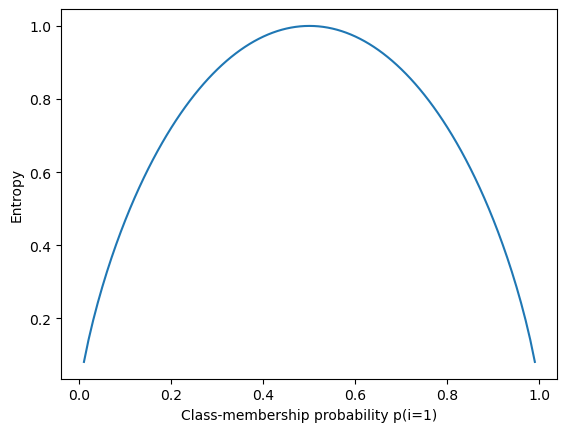

In [4]:
def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None 
       for p in x]

plt.ylabel('Entropy')
plt.xlabel('Class-membership probability p(i=1)')
plt.plot(x, ent)
plt.savefig('figures_decision_tree/03_26_entropy.png', dpi=300)
plt.show()

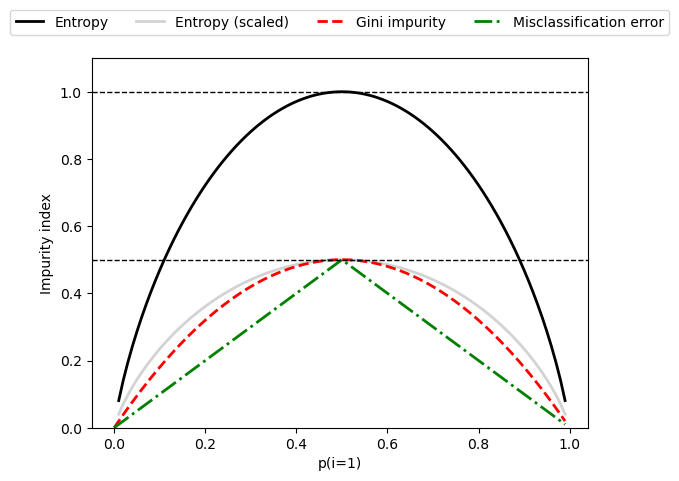

In [5]:
#Maximizing information gain 
def gini(p):
    return p * (1 - p) + (1 - p) * (1 - (1 - p))


def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))


def error(p):
    return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)

ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent]
err = [error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], 
                          ['Entropy', 'Entropy (scaled)', 
                           'Gini impurity', 'Misclassification error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=5, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity index')
plt.savefig('figures_decision_tree/03_19_impurity_index_f_probability.png', dpi=300, bbox_inches='tight')
plt.show()

In [7]:
#building a decision tree using the iris dataset
#itt standardizacio nelkul mennek be az adatok
#a train/test splitet is meglatjuk
from sklearn import datasets
from sklearn.model_selection import train_test_split
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [9]:
#segito plot
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='Test set')  

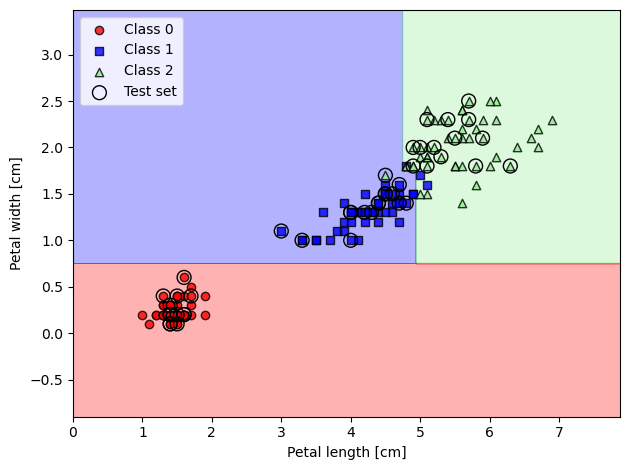

In [16]:
#max depth = 4 
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=4, 
                                    random_state=1)
tree_model.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree_model,
                      test_idx=range(105, 150))

plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('figures_decision_tree/03_20_decision_boundaries_iris_depth4.png', dpi=300)
plt.show()

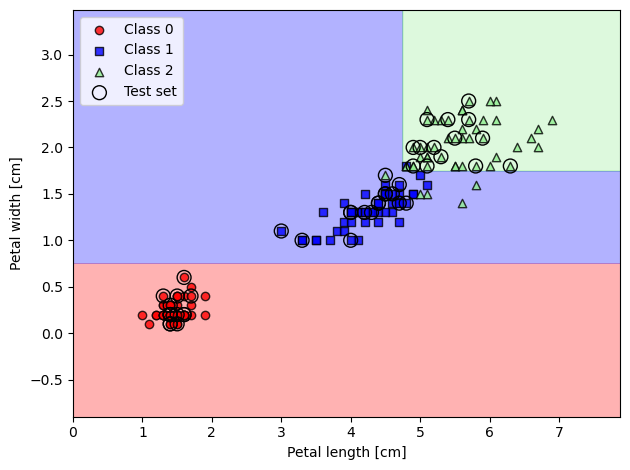

In [23]:
#max depth = 3 
from sklearn.tree import DecisionTreeClassifier

tree_model3 = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=3, 
                                    random_state=1)
tree_model3.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree_model3,
                      test_idx=range(105, 150))

plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('figures_decision_tree/03_20_decision_boundaries_iris_depth3.png', dpi=300)
plt.show()

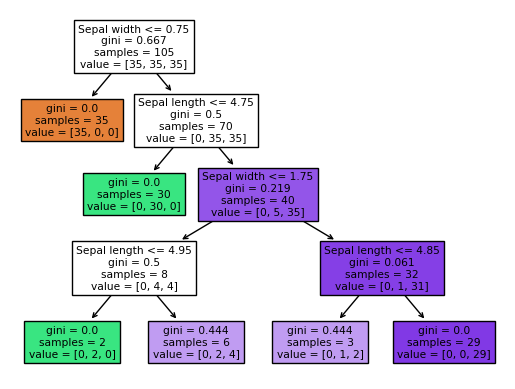

In [19]:
#max depth = 4 
from sklearn import tree

feature_names = ['Sepal length', 'Sepal width',
                 'Petal length', 'Petal width']
tree.plot_tree(tree_model,
               feature_names=feature_names,
               filled=True)

plt.savefig('figures_decision_tree/03_21_1_decision_tree_model_depth4.pdf')
plt.show()

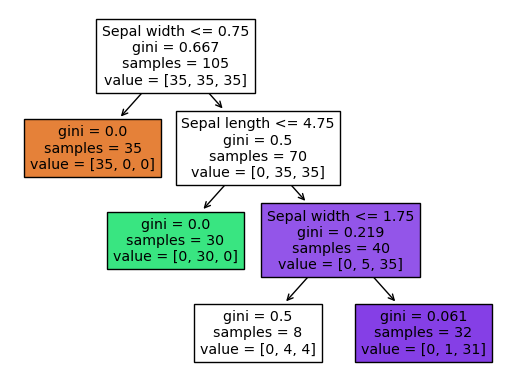

In [24]:
#max depth = 3 
from sklearn import tree

feature_names = ['Sepal length', 'Sepal width',
                 'Petal length', 'Petal width']
tree.plot_tree(tree_model3,
               feature_names=feature_names,
               filled=True)

plt.savefig('figures_decision_tree/03_21_1_decision_tree_model_depth3.pdf')
plt.show()

In [ ]:
# ezt majd kiprobalni:  https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html

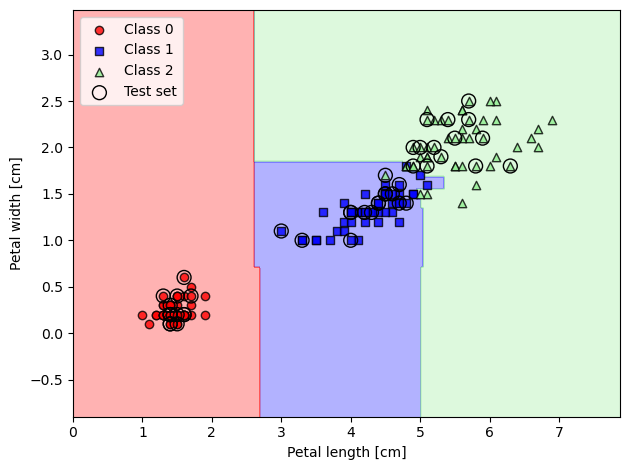

In [32]:
#Random forest
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=25, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)

plot_decision_regions(X_combined, y_combined, 
                      classifier=forest, test_idx=range(105, 150))

plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('figures/03_2_random_forest.png', dpi=300)
plt.show()

In [33]:
#ezt meg le kell ellenorizni, mivel csak ChatGPT bol lett kimasolva
from sklearn.metrics import accuracy_score

# For training data
y_train_pred = forest.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)

# For testing data
y_test_pred = forest.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)

print(f"Accuracy on training data: {accuracy_train:.2f}")
print(f"Accuracy on testing data: {accuracy_test:.2f}")

Accuracy on training data: 0.99
Accuracy on testing data: 0.98


In [34]:
#ezt meg le kell ellenorizni, mivel csak ChatGPT bol lett kimasolva
#confusion matrixrol olvasni, tobbet megtudni rola
from sklearn.metrics import confusion_matrix

confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)

print("Confusion Matrix for Training Data:")
print(confusion_matrix_train)

print("Confusion Matrix for Testing Data:")
print(confusion_matrix_test)

Confusion Matrix for Training Data:
[[35  0  0]
 [ 0 34  1]
 [ 0  0 35]]
Confusion Matrix for Testing Data:
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


In [36]:
#ezt meg le kell ellenorizni, mivel csak ChatGPT bol lett kimasolva
from sklearn.metrics import classification_report

classification_report_train = classification_report(y_train, y_train_pred)
classification_report_test = classification_report(y_test, y_test_pred)

print("Classification Report for Training Data:")
print(classification_report_train)

print("Classification Report for Testing Data:")
print(classification_report_test)

Classification Report for Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      0.97      0.99        35
           2       0.97      1.00      0.99        35

    accuracy                           0.99       105
   macro avg       0.99      0.99      0.99       105
weighted avg       0.99      0.99      0.99       105

Classification Report for Testing Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

